In [6]:
import numpy as np
#import handcalcs.render
import forallpeople as si
import scipy as sp
#%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
from math import sqrt,sin,tan,cos, pi
si.environment('thermal',top_level=True)
#%matplotlib inline
#from handcalcs.decorator import handcalc
from ipywidgets import interact,interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation
from skimage import color
from skimage import io
from IPython import display
import sys
np.set_printoptions(threshold=np.inf)

# Load Image

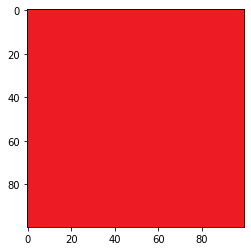

In [7]:
#img = color.rgb2gray(io.imread('newflat.png'))
#img = np.flip(img, axis = 0)
img = plt.imread('flat.png')
plt.imshow(img)
#plt.contourf(img)
#100mm by 100mm piece of aluminum
#top = 80 C
#bottom = 20 C
#Left & Right = 30 C

In [8]:
obj_bool = img<1.0
mesh_size = 2
sizeX = 20
sizeY = 20
Xnodes = sizeX/mesh_size+1
Ynodes = sizeY/mesh_size+1
condition = np.zeros([int(Xnodes),int(Ynodes)])
topT = 150
top_arr = topT*np.ones((1,int(Xnodes)))
bottomT = 10
bottom_arr = bottomT*np.ones((1,int(Xnodes)))
leftT = 60
left_arr = leftT*np.ones((int(Ynodes),1))
rightT = 60
right_arr = rightT*np.ones((int(Ynodes),1))
side_arr = [topT,rightT,bottomT,leftT]
MaxT = max(side_arr)
MinT = min(side_arr)

In [9]:
for i in range(0,int(Xnodes-1)):
    condition[0,i]=topT
    condition[int(Ynodes-1),i]=bottomT
    condition[i,0]=leftT
    condition[i,int(Xnodes-1)]=rightT
condition[0,0]= (condition[0,1]+condition[1,0])/2
condition[0,int(Xnodes-1)]= (condition[0,int(Xnodes-2)]+condition[1,int(Xnodes-1)])/2
condition[int(Ynodes-1),0]= (condition[int(Ynodes-2),0]+condition[int(Ynodes-1),1])/2
condition[int(Ynodes-1),int(Xnodes-1)]= (condition[int(Ynodes-1),int(Xnodes-2)]+condition[int(Ynodes-2),int(Xnodes-1)])/2
#print(condition)
    


In [10]:
coeffM = np.identity(int((Xnodes-2)**2))
#print(coeffM)
#print(len(coeffM))

In [17]:
#coeffM = np.empty([int((Xnodes-2)**2),int((Xnodes-2)**2)])
variM = np.empty([0,1])
varinit = 0
for i in range(1,int(Xnodes-1)):
    for j in range(1,int(Ynodes-1)):
        varinit += condition[i,j+1]
        varinit += condition[i,j-1]
        varinit += condition[i-1,j]
        varinit += condition[i+1,j]
        variM = np.vstack([variM,int(varinit*-1)])
        #variM.append(varinit)
        varinit = 0 
#print(variM)
    
generateRow = []
for i in range(1,int((Xnodes-2)+1)):
    pattern = -1
    generateRow.append(int(-1+(Xnodes-2)*i))
#print(generateRow)
    
for col in range(0, int(Xnodes-2)**2):
    for row in range(0,int(Ynodes-2)**2):
        if(row == col):
            coeffM[row,col] = -4
            if(row%(Xnodes-2)== 0):    #Left Edge Nodes
                coeffM[row,col+1] = 1
            if(row in generateRow):    #Right edge nodes
                coeffM[row,col-1] = 1
            if(col+(Xnodes-2)<= int(len(coeffM)-1)):
                coeffM[row,col+int((Xnodes-2))] = 1
            if(col-(Xnodes-2)>= 0):
                coeffM[row,col-int((Xnodes-2))] = 1
            if(row not in generateRow and row%(Xnodes-2)!= 0 ):
                coeffM[row,col+1] = 1
                coeffM[row,col-1] = 1
        
#print(coeffM)
#print(int((Xnodes-2)*2))
#print(2%(Xnodes-3))
#print(skipLcol)
#print(coeffM)
    
        
    

In [18]:
#Sol = np.linalg.inv(coeffM)
Sol = sp.linalg.solve(coeffM,variM)
Contour = np.empty([int(Xnodes-2),int(Xnodes-2)])
for j in range(0,int((Xnodes))):
    for i in range(0,int((Xnodes))):
        #Contour[j,i] = Sol[i]
        np.append(Contour,Sol[i])
FContour = np.flip(Contour, axis=0)
#print(Sol)
#print(Contour)
#print(np.flip(FContour,axis=0))
#print(Sol)

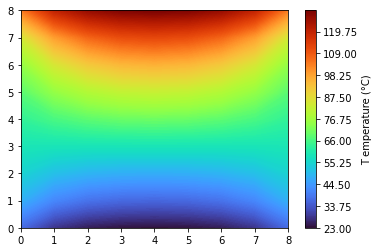

In [19]:
cmaper = plt.get_cmap('turbo')
#a = plt.contourf(np.flip(FContour,axis=0), 150, cmap=cmaper, vmin = np.min(FContour), vmax = np.max(FContour)*1 )
#a = plt.contourf(np.transpose(FContour), 150, cmap=cmaper, vmin = np.min(FContour), vmax = np.max(FContour)*0.8 )
Area1 = plt.contourf(FContour, 500, cmap=cmaper, vmin = np.min(FContour), vmax = np.max(FContour) )
#plt.xlim((0, sizeX/2-2))
#plt.ylim((0, sizeY/2-2)) 

plt.colorbar(Area1, label='T emperature (°C)')
coeffM = np.identity(int((Xnodes-2)**2))

In [20]:
np.min(FContour)

23.24559390049208

In [21]:
FContour[0, int(len(Contour)-1)]

36.55049865009052

In [16]:
Xnodes

11.0